In [1]:
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint

In [2]:
# url="https://www.alphavantage.co/query?"
# function="function=TIME_SERIES_DAILY"
# apikey="&apikey=1BRDPG4A7V2DTHYH"
# output="&outputsize=full"
# final_df=pd.DataFrame()

# companies={'FB','GOOGL','AAPL','MSFT','TWTR','UNH','HUM','PFE','JNJ','HCA','DAL','BA','CCL','UAL','STWD'
#          ,'AMZN','WMT','JCP','TGT','M','JPM','C','BRKB','WFC','BAC'}

In [3]:
# for company in companies:
    
#     print(company)
#     symbol="&symbol="+company
#     query_url=url+function+symbol+output+apikey
#     print(query_url)
#     response = requests.get(query_url).json()
#     time.sleep(13)
#     #pprint(response.json())

#     results_dict=response["Time Series (Daily)"]
#     results_df=pd.DataFrame(results_dict)
#     results_df_tram=results_df.transpose()
#     results_df_tram["Company"]=company
#     results_df_tram
#     final_df
#     frames = [final_df, results_df_tram]
#     final_df = pd.concat(frames)
#                     #final_df = pd.concat([final_df,ibm_df_tram], axis=1)
# final_df

In [4]:
# final_reset_df = final_df.reset_index()
# final_reset_df.to_csv('Data/Stocks_20years_updated.csv',index=False)
# final_reset

In [5]:
file = 'Data/Stocks_20years_updated.csv'
stock_data = pd.read_csv(file).rename(columns={'index':'Date',
                                              '1. open':'Open',
                                              '2. high':'High',
                                              '3. low':'Low',
                                              '4. close':'Close',
                                              '5. volume':'Volume'})
stock_data = stock_data[stock_data['Date']>'2019-11-01'].reset_index()
final_stock_df = stock_data.drop(columns='index')
final_stock_df

,Date,Open,High,Low,Close,Volume,Company
0,2020-04-16,23.7600,23.80,22.63,22.78,55973221,DAL
1,2020-04-15,24.9100,25.50,23.31,24.35,87798348,DAL
2,2020-04-14,23.9899,25.29,23.83,24.54,58599118,DAL
3,2020-04-13,24.9800,25.06,22.08,23.25,75904867,DAL
4,2020-04-09,25.4000,25.53,23.35,24.39,90591165,DAL
...,...,...,...,...,...,...,...
2707,2019-11-08,131.3000,133.04,130.97,133.00,5002928,JNJ
2708,2019-11-07,131.7300,132.38,131.01,131.43,5873726,JNJ
2709,2019-11-06,130.4200,131.48,129.70,130.96,5449972,JNJ
2710,2019-11-05,130.5300,131.47,129.68,130.42,6251180,JNJ


In [6]:
Technology=['FB','GOOGL','AAPL','MSFT','TWTR']
HealthCare=['UNH','HUM','PFE','JNJ','HCA']
Travel=['DAL','BA','CCL','UAL','STWD']
Retail=['AMZN','WMT','JCP','TGT','M']
Finance=['JPM','C','BRKB','WFC','BAC']
final_stock_df['Sector']=''

In [7]:
#for index, row in final_stock_df.iterrows():
#for index, row in types_df.iterrows():
    #tickler = row['Company']

#     if tickler in Technology:
#         final_stock_df.loc[index,'Sector'] = 'Technology'
#     elif tickler in HealthCare:
#         final_stock_df.loc[index,'Sector'] = 'Healthcare'
#     elif tickler in Travel:
#         final_stock_df.loc['Sector'] = 'Travel'
#     elif tickler in Retail:
#         final_stock_df.loc[index,'Sector'] = 'Retail'
#     elif tickler in Finance:
#         final_stock_df.loc[index,'Sector'] = 'Finance'
def f(row):
    if row['Company'] in Technology:
        value = 'Technology'
    elif row['Company'] in HealthCare:
        value = 'Healthcare'
    elif row['Company'] in Travel:
        value = 'Travel'
    elif row['Company'] in Retail:
        value = 'Retail'
    elif row['Company'] in Finance:
        value = 'Finance'
    return value
final_stock_df['Sector'] = final_stock_df.apply(f,axis=1)

In [8]:
final_stock_df

,Date,Open,High,Low,Close,Volume,Company,Sector
0,2020-04-16,23.7600,23.80,22.63,22.78,55973221,DAL,Travel
1,2020-04-15,24.9100,25.50,23.31,24.35,87798348,DAL,Travel
2,2020-04-14,23.9899,25.29,23.83,24.54,58599118,DAL,Travel
3,2020-04-13,24.9800,25.06,22.08,23.25,75904867,DAL,Travel
4,2020-04-09,25.4000,25.53,23.35,24.39,90591165,DAL,Travel
...,...,...,...,...,...,...,...,...
2707,2019-11-08,131.3000,133.04,130.97,133.00,5002928,JNJ,Healthcare
2708,2019-11-07,131.7300,132.38,131.01,131.43,5873726,JNJ,Healthcare
2709,2019-11-06,130.4200,131.48,129.70,130.96,5449972,JNJ,Healthcare
2710,2019-11-05,130.5300,131.47,129.68,130.42,6251180,JNJ,Healthcare


In [80]:
#final_stock_df['Date']=pd.to_datetime(final_stock_df['Date'])-pd.to_timedelta(7,unit='D')
final_stock_df['Date']=pd.to_datetime(final_stock_df['Date'])
final_date= final_stock_df.groupby(['Sector',pd.Grouper(key='Date',freq='W')])['Open','High','Low','Close'].mean()
final_index_df = final_date.reset_index(['Sector']).sort_values('Date',ascending=False)
final_final_df = final_index_df[['Sector','Close']].pivot(columns='Sector',values='Close')
final_final_df.head()

C:\Users\Wei_l\Anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Sector,Finance,Healthcare,Retail,Technology,Travel
Date,,,,,
2019-11-10,72.81750,172.6600,408.3072,384.4896,114.7964
2019-11-17,72.60250,176.8268,401.3632,388.0416,116.8852
2019-11-24,72.87350,184.9280,400.6456,389.4716,117.0860
2019-12-01,73.70875,187.8715,411.7665,391.6775,117.8665
2019-12-08,73.37550,188.1132,404.1052,391.5672,113.0208


Text(0.5, 0, 'Date (Weeks)')

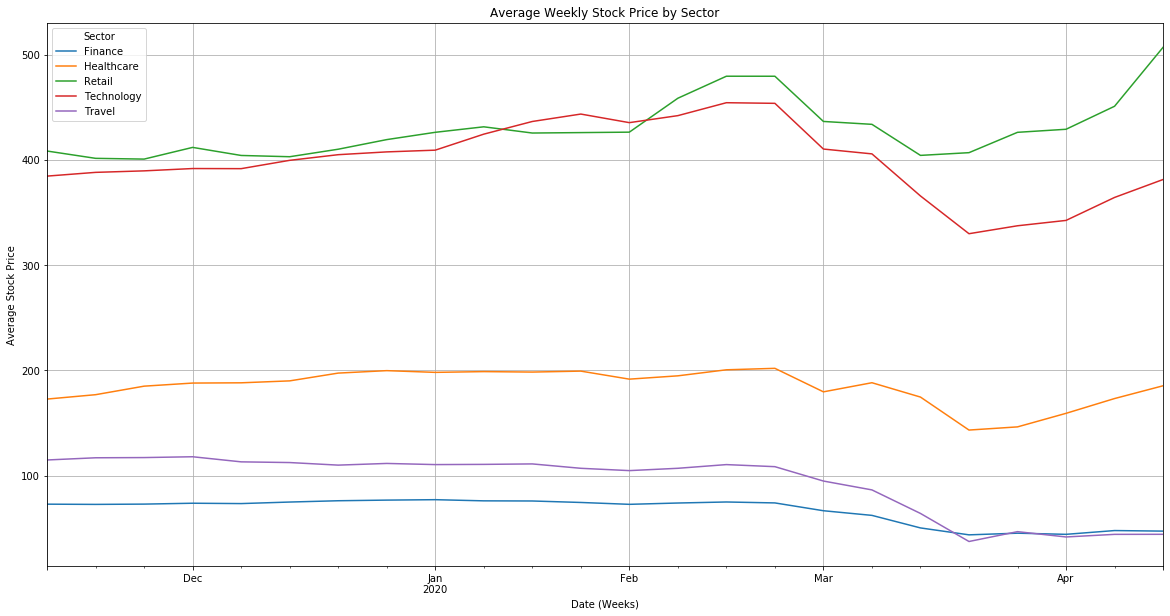

In [98]:
ax = final_final_df.plot.line(figsize=(20,10),title='Average Weekly Stock Price by Sector',grid=True)
ax.set_ylabel('Average Stock Price')
ax.set_xlabel('Date (Weeks)')

In [ ]:
#final_index_df.to_csv('Data/Stocks_20years_samples.csv',index=False)